In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 25 10:38:17 2021

@author: 17478
"""
import os
from termios import CIBAUD
import cv2
import numpy as np
from tqdm import tqdm
os.chdir("/home/mmdetection/data/ship/VOC2007/")
tr_img_pth = "JPEGImages/"

tr_img_files = [file for file in os.listdir(tr_img_pth)\
            if os.path.splitext(file)[1] in [".png",".jpg"]]

In [ ]:
for img_file in tqdm(tr_img_files[:20],desc="calculating mean",mininterval=0.1):
    img_file = os.path.join(tr_img_pth,img_file)
    img = cv2.imread(img_file,3)
    print(img.shape)

In [ ]:
print(len(os.listdir('/home/mmdetection/data/ship/VOC2007/Annotations')))

In [ ]:
print(len(os.listdir('/home/mmdetection/data/ship/VOC2007/JPEGImages')))

In [ ]:
img[:,:,1]

In [ ]:
img[:,:,2]

In [ ]:
for img_file in tqdm(tr_img_files,desc="calculating mean",mininterval=0.1):
    img_file = os.path.join(tr_img_pth,img_file)
    img = cv2.imread(img_file,-1)
    #print(img_file)
    try:
        totalRGB[0] += np.sum(img[:,:,0])
        totalRGB[1] += np.sum(img[:,:,1])
        totalRGB[2] += np.sum(img[:,:,2])
        sum += 1
    except:
        continue
img_size = img.shape[:2]
print(sum)

total_pixels = img_size[0]*img_size[1]*sum
#total_pixels = img_size[0]*img_size[1]*len(tr_img_files)

meanRGB[0] = totalRGB[0]/total_pixels
meanRGB[1] = totalRGB[1]/total_pixels
meanRGB[2] = totalRGB[2]/total_pixels
sum = 0
for img_file in tqdm(tr_img_files,desc="calculating var",mininterval=0.1):
    img_file = os.path.join(tr_img_pth,img_file)
    img = cv2.imread(img_file,-1)
    try:
        totalVar[0] += np.sum((img[:,:,0]-meanRGB[0])**2)
        totalVar[1] += np.sum((img[:,:,1]-meanRGB[1])**2)
        totalVar[2] += np.sum((img[:,:,2]-meanRGB[2])**2)
        sum += 1
    except:
        continue
total_pixels = img_size[0]*img_size[1]*sum

varRGB[0] = np.sqrt(totalVar[0]/total_pixels)
varRGB[1] = np.sqrt(totalVar[1]/total_pixels)
varRGB[2] = np.sqrt(totalVar[2]/total_pixels)
print("img_size:{}x{}".format(img_size[1],img_size[0]))
print("meanRGB:{}".format(meanRGB))
print("stdRGB:{}".format(varRGB))

In [3]:
from mmdet.apis import init_detector, inference_detector
import mmcv

# 指定模型的配置文件和 checkpoint 文件路径
config_file = '/home/mmdetection/configs/vfnet/vfnet_r101_fpn_mdconv_c3-c5_mstrain_2x_coco.py'
checkpoint_file = '/home/mmdetection/house/latest.pth'

# 根据配置文件和 checkpoint 文件构建模型
#model = init_detector(config_file, checkpoint_file, device='cuda:1')
print(help(inference_detector))

Help on function inference_detector in module mmdet.apis.inference:

inference_detector(model, imgs)
    Inference image(s) with the detector.
    
    Args:
        model (nn.Module): The loaded detector.
        imgs (str/ndarray or list[str/ndarray] or tuple[str/ndarray]):
           Either image files or loaded images.
    
    Returns:
        If imgs is a list or tuple, the same length list type results
        will be returned, otherwise return the detection results directly.

None


In [ ]:
# 测试单张图片并展示结果
img = '/home/mmdetection/data/ship/VOC2007/JPEGImages/00092.jpg'  # 或者 img = mmcv.imread(img)，这样图片仅会被读一次
result = inference_detector(model, img)
# 在一个新的窗口中将结果可视化
model.show_result(img, result)
# 或者将可视化结果保存为图片
#model.show_result(img, result, out_file='/home/mmdetection/data/ship/result.jpg')

In [4]:
import mmcv
import os
import numpy as np
from mmcv.runner import load_checkpoint
from mmdet.models import build_detector
#from mmdet.apis import init_detector, inference_detector, show_result


config_file = '/home/mmdetection/configs/cascade_rcnn/111.py'
checkpoint_file = '/home/mmdetection/ship4/latest.pth'

model = init_detector(config_file,checkpoint_file, device='cuda:0')

img_dir = '/home/mmdetection/data/ship/VOC2007/JPEGImages/'
out_dir = '/home/mmdetection/data/ship/predict/'

if not os.path.exists(out_dir):
    os.mkdir(out_dir)

fp = open('/home/mmdetection/data/ship/VOC2007/ImageSets/Main/test.txt','r')
test_list = fp.readlines()

imgs=[]
for test_1 in test_list:
    test_1 = test_1.replace('\n','')
    name = img_dir + test_1 + '.jpg'
    imgs.append(name)

results = []

count = 0
for img in imgs:
    count += 1
    if count % 100 == 1:
        print('model is processing the {}/{} images.'.format(count,len(imgs)))
    result = inference_detector(model,img)
    results.append(result)

print('\nwriting results to {}'.format('ship.pkl'))
mmcv.dump(results,out_dir+'ship.pkl')

load checkpoint from local path: /home/mmdetection/ship4/latest.pth
model is processing the 1/18112 images.
model is processing the 101/18112 images.
model is processing the 201/18112 images.
model is processing the 301/18112 images.
model is processing the 401/18112 images.
model is processing the 501/18112 images.
model is processing the 601/18112 images.
model is processing the 701/18112 images.
model is processing the 801/18112 images.
model is processing the 901/18112 images.
model is processing the 1001/18112 images.
model is processing the 1101/18112 images.
model is processing the 1201/18112 images.
model is processing the 1301/18112 images.
model is processing the 1401/18112 images.
model is processing the 1501/18112 images.
model is processing the 1601/18112 images.
model is processing the 1701/18112 images.
model is processing the 1801/18112 images.
model is processing the 1901/18112 images.
model is processing the 2001/18112 images.
model is processing the 2101/18112 images

In [10]:
from argparse import ArgumentParser
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
import pickle
import numpy as np

f = open('/home/mmdetection/data/ship/predict/ship.pkl','rb')
data = pickle.load(f)
print(len(data))

fp = open('/home/mmdetection/data/ship/VOC2007/ImageSets/Main/test.txt','r')
test_list = fp.readlines()

18112


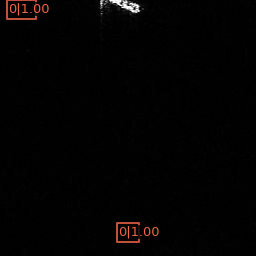

In [11]:
img = '/home/mmdetection/data/ship/VOC2007/JPEGImages/27474.jpg'  # 或者 img = mmcv.imread(img)，这样图片仅会被读一次
from PIL import Image

ims = model.show_result(img, data[1800])
img = Image.fromarray(ims, 'RGB')
img.show()

In [12]:
def convert(size, box):
    #print(box)
    box= (box[0],box[2],box[1],box[3])
    #print(box)
    dw = 1./(size[0])
    dh = 1./(size[1])
    x = (box[0] + box[1])/2.0
    y = (box[2] + box[3])/2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x, y, w, h)


In [13]:
i = 0
ship_code = {}
iou = 0.45
name_list = []
ship_all_box = []
for img in data[:]:
    #print(len(img[0]))
    #print(img[0])
    score_all = []
    ship_add =[]
    ship_box = []

    for number in img[0]:
        #print(number.tolist())
        #print(len(number))
        
        if len(number) != 0:
            #print(number)
            x1,y1,x2,y2,score = number[0],number[1],number[2],number[3],number[4]
            score_all += [score]
            if score > iou:
                #print(score)
                ship_add += [(x1,y1,x2,y2)]
                #ship_code[test_list[i]] = x1,y1,x2,y2
        else:
            ship_code[test_list[i]] = {}
    #print(ship_add)
    name = test_list[i].replace('\n','')
    
    for box in ship_add:
        #print(box)
        box_2 = convert((256,256), box)
        #print(box_2)
        ship_box += [str(box_2[0]) + ' ' +str(box_2[1]) + ' '+str(box_2[2]) + ' '+str(box_2[3])]
    
    ship_code[name] = ship_box
    if (np.array(score_all) <= iou).all():
        ship_code[name] = ''
    i += 1


In [14]:
import pandas as pd

ship_code_all = [ship_code]
df = pd.DataFrame(ship_code_all).T
df = df.reset_index(level=0)
df["index"] = pd.to_numeric(df["index"])
df = df.sort_values(by="index" , ascending=True)


In [15]:
ship_final_all = []
for i in df[0]:
    if len(i) > 1:
        final = ''
        k = 1
        for j in i:
            if k != len(i):
                final += str(j) + ';'
            else:
                final += str(j)
            k += 1
    elif len(i) == 1:
        #print(i)
        #print(i[0])
        final = i[0]
    else:
        final = ''
    ship_final_all += [final]
df[0] = ship_final_all

df.to_csv('/home/mmdetection/data/ship/predict/submission.csv',index= False,header=0)

FileNotFoundError: [Errno 2] No such file or directory: 'predict/submission.csv'

In [ ]:
import os
import pandas as pd
import random 

jpg_list_test = os.listdir('test')
jpg_list_test.sort()
len(jpg_list_test)


In [ ]:
file_obj3 = open("VOC2007/ImageSets/Main/test.txt", 'w', encoding='utf-8')
for i in jpg_list_test:
    k = str(i.split('.')[0])
    file_obj3.writelines(k)
    file_obj3.write('\n')

file_obj3.close()

In [ ]:
fp = open('/home/mmdetection/data/ship/VOC2007/ImageSets/Main/test.txt','r')
test_list = fp.readlines()
test_list

txt = '''<annotation>
    <folder>VOC2007</folder>
    <filename>39602.jpg</filename>
    <path>/home/mmdetection/data/ship/train/39602.jpg</path>
    <source>
        <database>None</database>
    </source>
    <size>
        <width>256</width>
        <height>256</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>0</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <difficult>0</difficult>
        <bndbox>
            <xmin>110</xmin>
            <ymin>236</ymin>
            <xmax>125</xmax>
            <ymax>246</ymax>
        </bndbox>
    </object>
</annotation>
'''

import time
import os
from PIL import Image
import cv2
import numpy as np


'''txt转xml函数'''
def translate(lists): 
    source = {}
    label = {}
    for jpg in lists:
        jpg = jpg.split('\n')[0]
        fxml = '/home/cape-bd/liuzhuo/mmdetection/data/ship/VOC2007/Annotations/' + jpg + '.xml'
        fxml = open(fxml, 'w');
        fxml.write(txt)

translate(test_list)